# 手把手带你从0开始写一个Transformer

In [4]:
import os
import math
import copy

from IPython.display import Image

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable


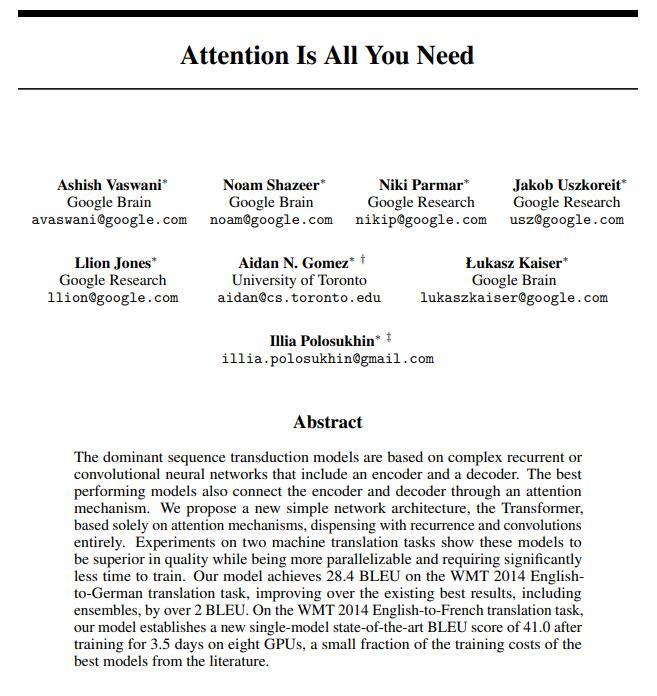

In [6]:
Image(filename='./images/transformer.jpg')

  Transformer 一经提出，在NLP领域引起了巨大轰动，正如他的题目所言 "[Attention is all you need](https://arxiv.org/abs/1706.03762)", 这个工作完全摒弃了之前RNN等时序模型，完全使用注意力机制来进行序列建模。这个工作除了在机器翻译质量上面有了巨大的提升，并且为其他领域提供了一种新的完全基于注意力机制的结构，如随后发展起来的[BERT](https://arxiv.org/abs/1810.04805)，各种[BERT的变形和改进](https://arxiv.org/abs/2009.06732)，以及在视觉领域应用Transformer （"[A Survey on Visual Transformer](https://arxiv.org/abs/2012.12556)"）,论文写的很精彩和清晰，但是初次读论文的我们可能会对论文中的一些公式符号并不是很明白，导致很难将其正确的实现。

  因此在本文中，我将带领大家一步一步从0搭建一个完整的Transformer模型，我将从自底向上以及自顶向下两种方式来分别讲述如何实现和编码Transformer，讲述过程中论文中公式我会以截图给出方便说明，对于每一个类和函数我会尽量表达清楚他的输入输出以及向量维度。本文代码参考了哈佛[havardnlp](https://github.com/harvardnlp/annotated-transformer),对其做一个中文版的描述，方便大家学习。